In [1]:
import numpy as np
import sys
import dimod
import matplotlib.pyplot as plt

from dwave.system import EmbeddingComposite, DWaveSampler
from pythia_generator import generator
from qubo_generator import make_qubo
from embedding_generator import generate_embedding

In [3]:
num_ev = 100
n_part = []
n_qubits = []
chain_length = []

for i in range(num_ev):
    # Generate a Pythia event
    particles = generator()

    # Use particles in event to generate qubo
    #qubo, offset = make_qubo(particles, np.pi/2.)

    embedding = generate_embedding(len(particles))

    # Get distribution of chain lengths
    for i in range(len(embedding)):
        chain_length.append(len(embedding[i]))

    n_part.append(len(particles))
    n_qubits.append(len(embedding))
    

Embedding on 990 spin variables
Embedding on 595 spin variables
Embedding on 561 spin variables
Embedding on 630 spin variables
Embedding on 1275 spin variables
Embedding on 465 spin variables
Embedding on 253 spin variables
Embedding on 990 spin variables
Embedding on 1953 spin variables
Embedding on 780 spin variables
Embedding on 496 spin variables
Embedding on 253 spin variables
Embedding on 378 spin variables
Embedding on 630 spin variables
Embedding on 378 spin variables
Embedding on 1596 spin variables
Embedding on 1176 spin variables
Embedding on 2346 spin variables
Embedding on 1378 spin variables
Embedding on 1378 spin variables
Embedding on 1225 spin variables
Embedding on 1275 spin variables
Embedding on 378 spin variables
Embedding on 1225 spin variables
Embedding on 741 spin variables
Embedding on 741 spin variables
Embedding on 1081 spin variables
Embedding on 861 spin variables
Embedding on 741 spin variables
Embedding on 351 spin variables
Embedding on 1081 spin variab

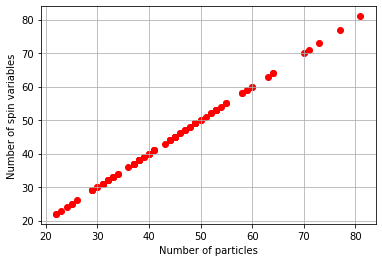

In [3]:
fig, ax = plt.subplots()

ax.grid()
ax.scatter(n_part, n_qubits, color='red')
ax.set_xlabel('Number of particles')
ax.set_ylabel('Number of spin variables')

#plt.savefig('plots/nqubits.png')
plt.show()

In [ ]:
embedding

In [ ]:
# Get distribution of chain lengths
chain_length = []
for i in range(len(embedding)):
    chain_length.append(len(embedding[i]))

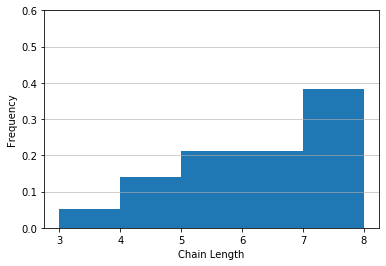

In [4]:
# Plot results
counts, bins = np.histogram(chain_length, range(3,10), density=True)
plt.hist(bins[:-1], bins, weights=counts)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Chain Length')
plt.ylabel('Frequency')
plt.ylim(0,0.6)
plt.savefig('images/chainlength_dist.png')

In [ ]:
x_val = []
y_val = []
z_val = []

n_part = len(particles)

for i in range(0,n_part):
    key_x = 's[%s]' %i
    for j in range(0,n_part):
        key_y = 's[%s]' %j
        try:
            value = qubo[key_x, key_y]
            x_val.append(i)
            y_val.append(j)
            z_val.append(value)
        except KeyError:
            #print(key_x, key_y)
            continue
            

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

plt.scatter(x_val, y_val, c = z_val)
plt.xlabel('Spin Variable')
plt.ylabel('Spin Variable')

cbar = plt.colorbar()
cbar.set_label("Coupling Strength", labelpad=+1)

plt.savefig('images/coupling_strength_pi2.png')
plt.show()

In [ ]:
np.max(z_val)

In [ ]:
z_val